In [10]:
library(ggplot2)
library(dplyr)

In [2]:
filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/scanpy/neuroseq_metadata_D52.txt"
df = read.csv(filename, sep = "\t")
head(df)

index,batch,donor_id,log1p_n_genes_by_counts,log1p_total_counts,log1p_total_counts_mito,n_genes_by_counts,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,...,total_counts,total_counts_mito,cluster_id,time_point,pool_id,treatment,n_counts_all,celltype,celltype_new,cluster_id_new
TCCACACAGGACAGAA-1-23,23,HPSI0114i-eipl_1,7.650169,8.834774,3.637586,2100,46.70938,58.09552,72.58299,...,6868,37,4,D52,pool1,ROT,6868,FPP,FPP,4
TAAGAGAGTGGCGAAT-1-6,6,HPSI0115i-jakt_1,7.813592,8.701845,5.786897,2473,39.66406,48.36188,62.33161,...,6013,325,7,D52,pool2,NONE,6013,Sert,Sert,7
TGACTAGCAGGAATGC-1-14,14,HPSI0314i-sojd_3,8.051341,9.357207,5.560682,3137,46.63673,55.30610,68.23245,...,11581,259,1,D52,pool4,NONE,11581,Epen1,Epen1,1
TGCTGCTAGCAGATCG-1-36,36,HPSI0115i-iuad_2,7.742836,9.016392,4.007333,2304,48.03303,58.23215,72.53521,...,8236,54,1,D52,pool7,ROT,8236,Epen1,Epen1,1
TTCGAAGAGACCGGAT-1-0,0,HPSI0114i-eipl_1,7.594884,8.261269,4.584968,1987,31.44703,42.32558,59.56072,...,3870,97,2,D52,pool1,NONE,3870,Astro,Astro,2
ACGAGCCCAGCGTCCA-1-30,30,HPSI1014i-qayj_4,7.962764,9.372799,5.323010,2871,46.34022,56.87325,70.84927,...,11763,204,0,D52,pool5,ROT,11763,Sert,Sert,0


In [4]:
filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/da_d52_untreated_pseudocells_20_harmony_PCs_atleast10cells_20nn.csv"
df_clusters = read.csv(filename, row.names = 1)
head(df_clusters)

cell,cluster,donor_id,ncells,pseudo_cell
CCAGCGAGTTACTGAC-1-64,cluster1,HPSI0513i-veve_2,88,HPSI0513i-veve_2-cluster1
GATCTAGCATCCAACA-1-65,cluster1,HPSI0513i-veve_2,88,HPSI0513i-veve_2-cluster1
TGGCCAGCAAGCTGTT-1-64,cluster1,HPSI0513i-veve_2,88,HPSI0513i-veve_2-cluster1
GCTGCGACAAGGACAC-1-64,cluster1,HPSI0513i-veve_2,88,HPSI0513i-veve_2-cluster1
ACATGGTGTTATCACG-1-64,cluster1,HPSI0513i-veve_2,88,HPSI0513i-veve_2-cluster1
GTTACAGCACAGAGGT-1-64,cluster1,HPSI0513i-veve_2,88,HPSI0513i-veve_2-cluster1


In [5]:
nrow(df_clusters)

[1] 54217

In [8]:
df$cell = df$index

In [14]:
df1 = inner_join(df, df_clusters, by = c("donor_id","cell"))
nrow(df1)
head(df1)

Warning message:
“Column `donor_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `cell` joining factors with different levels, coercing to character vector”

[1] 54217

index,batch,donor_id,log1p_n_genes_by_counts,log1p_total_counts,log1p_total_counts_mito,n_genes_by_counts,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,...,pool_id,treatment,n_counts_all,celltype,celltype_new,cluster_id_new,cell,cluster,ncells,pseudo_cell
CCAGCGAGTTACTGAC-1-64,64,HPSI0513i-veve_2,8.417373,9.667068,6.216606,4524,28.88903,38.44059,54.28807,...,pool11,NONE,15788,DA,DA,3,CCAGCGAGTTACTGAC-1-64,cluster1,88,HPSI0513i-veve_2-cluster1
ACGTCAAGTCTAGCCG-1-51,51,HPSI1014i-babz_3,7.956126,8.983565,5.327876,2852,34.84316,46.18570,61.96989,...,pool8,NONE,7970,DA,DA,3,ACGTCAAGTCTAGCCG-1-51,cluster1,40,HPSI1014i-babz_3-cluster1
CGTCTACGTCGGGTCT-1-35,35,HPSI0215i-hipn_1,8.022569,9.096051,5.902633,3048,30.46306,41.58538,58.84068,...,pool7,NONE,8919,DA,DA,3,CGTCTACGTCGGGTCT-1-35,cluster1,60,HPSI0215i-hipn_1-cluster1
TGTATTCAGGCAAAGA-1-25,25,HPSI1014i-qayj_4,7.793587,8.724045,5.135798,2424,39.11841,48.99154,63.28887,...,pool5,NONE,6148,DA,DA,3,TGTATTCAGGCAAAGA-1-25,cluster1,79,HPSI1014i-qayj_4-cluster1
GTTCATTAGTGGTAAT-1-73,73,HPSI0413i-coxy_33,8.370779,9.747594,6.467699,4318,31.62108,43.26788,59.43782,...,pool15,NONE,17112,DA,DA,3,GTTCATTAGTGGTAAT-1-73,cluster1,217,HPSI0413i-coxy_33-cluster1
GCTGCAGAGCCCAACC-1-65,65,HPSI0513i-veve_2,8.425297,9.647820,6.028278,4560,27.84916,37.71550,53.60625,...,pool11,NONE,15487,DA,DA,3,GCTGCAGAGCCCAACC-1-65,cluster2,69,HPSI0513i-veve_2-cluster2


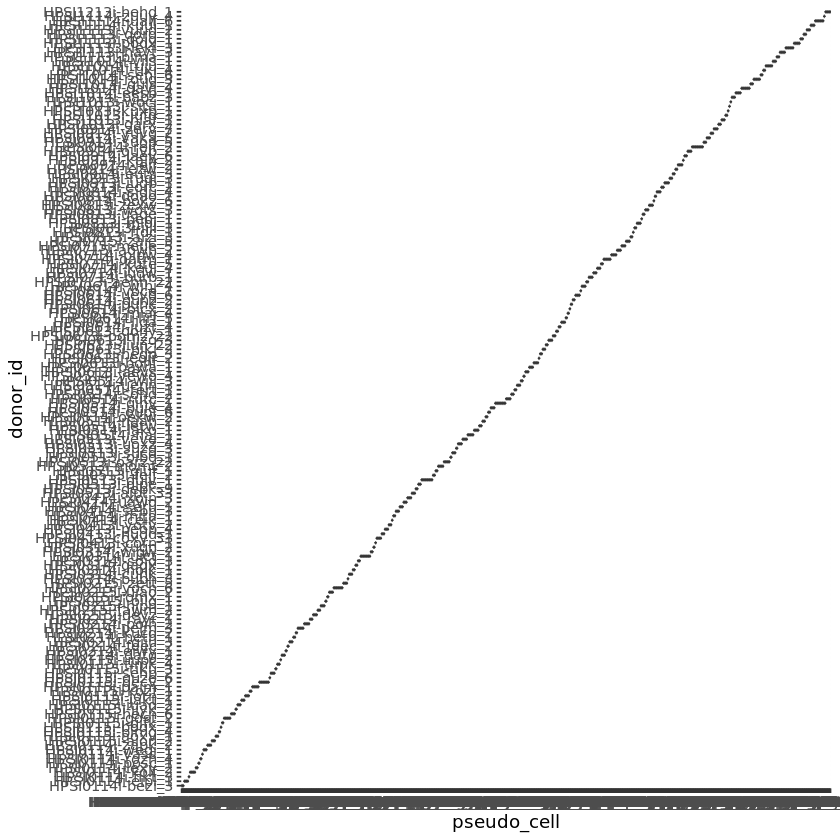

In [15]:
ggplot(df1, aes(x = pseudo_cell, y = donor_id)) + geom_boxplot()